# 衡量回归算法的标准

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## 波士顿房产数据

In [2]:
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
x = boston.data[:, 5] # 暂时只使用房间的数量
x.shape

(506,)

In [5]:
y = boston.target
y.shape

(506,)

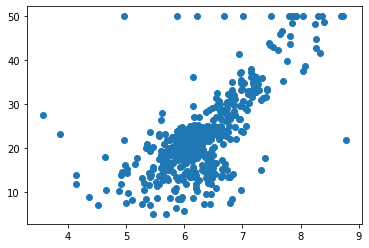

In [6]:
plt.scatter(x, y)
plt.show()

In [7]:
np.max(y)

50.0

In [8]:
x = x[y < 50.0]
y = y[y < 50.0]

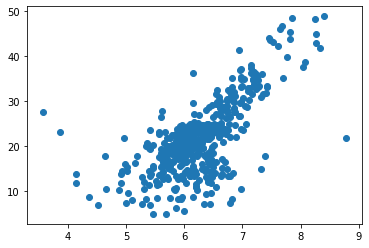

In [9]:
plt.scatter(x, y)
plt.show()

## 使用简单线性回归

In [10]:
from playML.train_test_split_self import train_test_split_self

In [11]:
x_train, x_test, y_train, y_test = train_test_split_self(x, y, seed=666)
x_train.shape

(392,)

In [12]:
from playML.SimpleLinearRegression import SimpleLinearRegression2
reg = SimpleLinearRegression2()
reg.fit(x_train, y_train)

SimpleLinearRegression2()

In [13]:
reg.a_

7.8608543562689555

In [14]:
reg.b_

-27.459342806705543

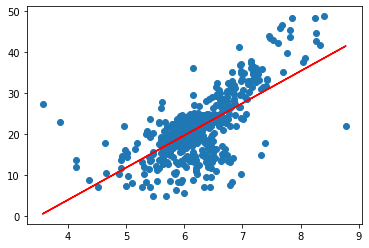

In [15]:
plt.scatter(x, y)
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

In [16]:
y_predict = reg.predict(x_test)
y_predict

array([23.09381156, 23.14883754, 19.20268865, 29.02089574, 25.6014241 ,
        5.06887252, 24.66598243, 26.47397893, 15.52380881, 28.38416654,
       17.29250104, 13.0633614 , 23.99780981, 21.37228445, 23.29033292,
       21.66313607, 21.22292822, 19.94946982, 22.41777808, 25.17693796,
       19.51712283, 24.14716604, 24.57165218, 19.07691498, 23.14097668,
       28.78507011, 20.46042535, 18.18863844, 15.93257324, 29.46110359,
       31.65428195, 19.36776659, 16.77368466, 38.07659996, 19.72936589,
       20.99496345, 18.27510784, 24.22577459, 21.67099692, 22.7086297 ,
       21.22292822, 19.17910609, 15.41375685, 19.41493172, 16.5771633 ,
       23.13311583, 23.71481905, 30.13713706, 17.99211708, 24.69742585,
       19.43065343, 25.4284853 , 22.71649055, 16.53785903, 19.13194096,
       18.82536764, 22.15836989, 18.55809859, 25.03544258, 29.52399042,
       18.75461995, 19.69006162, 18.59740287, 14.58836714, 18.81750679,
       24.65812158, 20.83774636, 19.77653102, 27.88893272, 19.32

## MSE 均方误差

In [17]:
mse_test = np.sum((y_test - y_predict)**2) / len(y_test)
mse_test

24.156602134387438

## RMSE 均方根误差

In [18]:
rmse_test = np.sqrt(mse_test)
rmse_test

4.914936635846635

## MAE 平均绝对误差

In [19]:
mae_test = np.sum(np.absolute(y_test -y_predict)) / len(y_test)
mae_test

3.5430974409463873

In [20]:
from playML.metrics import mean_squared_error
from playML.metrics import root_mean_squared_error
from playML.metrics import mean_absolute_error

In [21]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [22]:
root_mean_squared_error(y_test, y_predict)

4.914936635846635

In [23]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

## scikit-learn中的MSE和MAE

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [25]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [26]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

In [27]:
np.sqrt(mean_squared_error(y_test, y_predict))

4.914936635846635

## R Squared

In [28]:
from playML.metrics import r2_score

In [29]:
r2_score(y_test, y_predict)

0.6129316803937322

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.6129316803937324

In [31]:
reg.score(x_test, y_test)

0.6129316803937322